<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/ML_modl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from scipy.optimize import curve_fit 


In [43]:
df=pd.read_excel("/content/drive/MyDrive/ColabNotebooks/muon_data.xlsx")
df

In [44]:
# Create a copy for further processing
dataset = df.copy()
# Check for null values
dataset.isna().sum()

In [45]:
# Split the Dataset and create train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

In [46]:
# Remove columns not needed
dataset_size2=dataset.drop(['E_mu', 'Emu_p','Ee_p'], axis=1)
dataset_size2.describe().transpose()

In [47]:
# Separate labels and features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("E_mu")
test_labels = test_features.pop("E_mu")

In [48]:
print(train_features)
print(test_features)
print(train_labels)
print(test_labels)

In [49]:
#normalisation
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()
# Fit on Training Data
feature_scaler.fit(train_features.values)
label_scaler.fit(train_labels.values.reshape(-1, 1))

In [50]:
# Transform both training and testing data
train_features = feature_scaler.transform(train_features.values)
test_features = feature_scaler.transform(test_features.values)
train_labels = label_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = label_scaler.transform(test_labels.values.reshape(-1, 1))

In [51]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [52]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    
)


In [53]:
model.compile(optimizer="Adam",
               loss="mean_squared_error")

In [54]:
# Now let's train the model
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=0)

In [55]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

In [56]:
plot_loss(history)

In [57]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

In [58]:
#Save model 
model.save("correct_ML_mdl.h5")

In [59]:
# Load and perform predictions
results = model.predict(test_features)

In [60]:
# We can decode using the scikit-learn object to get the result
decoded_result = label_scaler.inverse_transform(results.reshape(-1,1))
print(decoded_result)
print(decoded_result.shape)
decoded_testlabels =label_scaler.inverse_transform(test_labels)

Text(0, 0.5, 'Predicted Energy (GeV)')

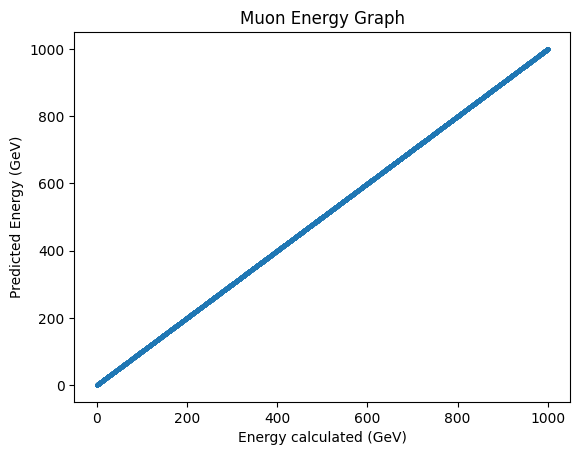

In [36]:
plt.scatter(decoded_testlabels, decoded_result, s=3)
plt.title("Muon Energy Graph")
plt.xlabel("Energy calculated (GeV)")
plt.ylabel("Predicted Energy (GeV)")

In [61]:
# diff= decoded_result- decoded_testlabels
# plt.hist(diff,bins= 500)

In [39]:
def gauss(x,amp,mu,sigma):
    return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)

This is n==> [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   1.   0.   4.   0.   1.   1.   1.   2.   3.   1.   1.
   0.   0.   2.   8.   2.   1.   4.   2.   2.   6.   2.   2.   4.   5.
   2.   4.   4.   3.   2.   6.   4.   5.   6.   2.   6.   6.   2.   4.
   5.   7.   4.   3.   1.   3.   2.   2.   4.   3.   4.   4.   4.   3.
   4.   6.   2.   1.   1.   5.   4.   2.   4.   5.   6.   4.   7.   2.
   7.   4.   5.   6.   4.   2.   4.   6.   1.   0.   1.   0.   2.   0.
   1.   4.   5.   5.   1.   1.   2.   4.   5.   2.   4.   0.   6.   5.
   7.   2.   2.   4.   3.   3.   6.   7.   3.   4.   6.   4.   3.   7.
   6.   5.   6.   7.   1.   3.   8.   8.   6.   9.   8.   5.   8.   9.
  11.   6.  13.  10.  12.   8.  16.   8.  10.  14.  12.  12.   8.   9.
  15.   5.  18.  18.  20.  13.  15.  26.  25.  18.  24.  31.  27.  40.
  37.  31.  38.  41.  39.  50.  53.  44.  47.  35.  36.  55.  40.  48.
  52.  65.  54.  44.  56.  67.  58.  60.  61.  58.  67.  64.  60

<ipython-input-39-679ff3a10ba0>:2: RuntimeWarning: invalid value encountered in sqrt
  return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)


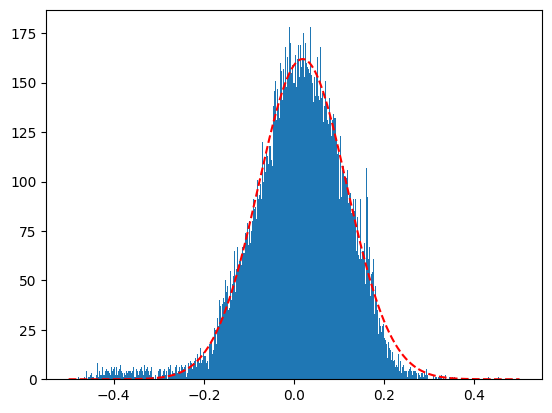

In [40]:
x= np.linspace(-0.5,0.5,500)
n,bins,patches = plt.hist(diff,bins= 500,range= (-0.5,0.5))#, ); # range= (-0.5,1.5)
print("This is n==>",n, bins, patches)
y=n 
print(max(y))
popt, pcov = curve_fit(gauss, x,y)#p0= (300,0.0,0.5)) # p0= (amp, mean, satndard deviation)===> guessed
y= gauss(x, popt[0], popt[1], popt[2])
plt.plot(x,y,color= 'r', linestyle='dashed', label='fit function');
print(popt[0],popt[1],popt[2]) # gives actual (amp, mean, standard deviation)
# plt.show()